[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/CU-Denver-MathStats-OER/ODEs/blob/main/Chp3/Phase-Portraits-Tutorial.ipynb)


# Quick Reference for Phase Portraits

This notebook demonstrates the use of plotting functions to visualize phase portraits for systems of ODEs.

In [1]:
# Set up environment
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import sys
sys.path.insert(0, '..')

## Visualizing Solutions to Systems

The following example uses the predator-prey model for rabbits and foxes.

### 3-Dimensional Solution

In [30]:
# Definition of parameters
a = 3.  # natural growth rate of rabbits
b = -1.4  # natural dying rate of rabbits
c = -1.  # natural dying rate of fox
d = 0.8  # factor describes how many rabbits create new fox
X0 = np.array([3, 2])  # initials conditions: 10 rabbits and 5 foxes
tspan = np.linspace(0, 15,  1000)  # time to evaluate solution

# Define differential equation
def dxdt(X, t, a,b,c,d):
    
    return np.array([
        a*X[0] + b*X[0]*X[1],
        c*X[1] + d*X[0]*X[1]
    ])

In [31]:
X = odeint(dxdt, X0, t=tspan, args = (a,b,c,d)) # solve system

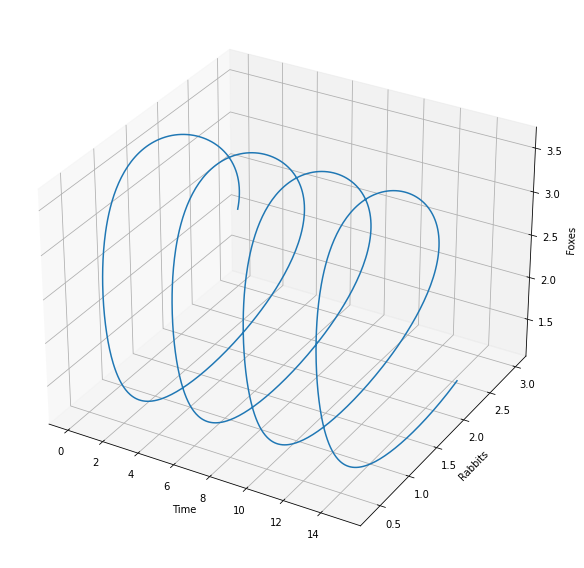

In [33]:
plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')

ax.plot3D(tspan, X[:,0], X[:,1])
ax.set_xlabel('Time')
ax.set_ylabel('Rabbits')
ax.set_zlabel('Foxes')

plt.tight_layout()

### 2-D Projections

#### Rabbits v. Time

In [ ]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, projection='3d') 
ax1.plot(tspan, X[:,0], 'r:', zdir='z', zs=0, alpha=.8)
ax1.plot3D(tspan, X[:,0], X[:,1])
ax1.set_xlabel('Time')

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(tspan, X[:,0], 'r-', alpha=.5)
ax2.grid()
ax2.set_xlabel('Time')
ax2.set_ylabel('Rabbits')
plt.tight_layout()

#### Foxes v. Time

In [ ]:
fig = plt.figure(figsize=(12,6))
# gridspec_kw={'height_ratios': [3, 2]}
ax1 = fig.add_subplot(1, 2, 1, projection='3d') 
ax1.plot(tspan, X[:,1], 'g:', zdir='y', zs=40, alpha=.8)
ax1.plot3D(tspan, X[:,0], X[:,1])
ax1.set_xlabel('Time')

ax2 = fig.add_subplot(1, 2, 2)

ax2.plot(tspan, X[:,1], 'g-')
ax2.grid()
ax2.set_xlabel('Time')
ax2.set_ylabel('Foxes')
plt.tight_layout()

#### Rabbits v. Foxes

In [ ]:
fig = plt.figure(figsize=(12,6))
# gridspec_kw={'height_ratios': [3, 2]}
ax1 = fig.add_subplot(1, 2, 1, projection='3d') 

ax1.plot(X[:,0], X[:,1], 'k:', zdir='x', zs=0, alpha=.5)
ax1.plot3D(tspan, X[:,0], X[:,1])
ax1.set_xlabel('Time')

ax2 = fig.add_subplot(1, 2, 2)

ax2.plot(X[:,0], X[:,1], 'k-', alpha=.5)
ax2.grid()
ax2.set_xlabel('Rabbits')
ax2.set_ylabel('Foxes')
plt.tight_layout()

## Plotting a Phase Portrait

The following example utilizes an undamped pendulum with no external forcing. The `phase_portrait` function represents the trajectories of a system in phase space. The user must specify the plotting ranges, the differential equation, and any parameters to the differential equation. In the case of the undamped pendulum, there are no additional paramters that need to be specified. When we return to the predator-prey model, parameters must be passed to the function.

In [34]:
# Note, params passed as an empty tuple to make code compatible withg adding parameters, e.g. damping constant
def f(Y, t):
    y1, y2 = Y
    return [y2, -np.sin(y1)]

<AxesSubplot:>

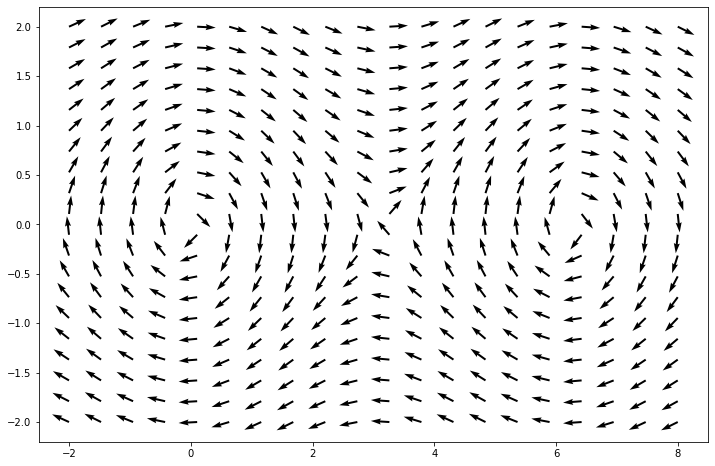

In [35]:
from utils.ode_tools import phase_portrait

y1 = np.linspace(-2.0, 8.0, 20)
y2 = np.linspace(-2.0, 2.0, 20)
phase_portrait(y1, y2, f)

## Plotting a Solution in a Phase Plane

Given a set of initial conditions, the `plot_phase_sol` plots the solution in the phase plane given some range of times. In addition to the function arguments used in `phase_portrait`, the user must specify initial conditions as two numeric arugments.

In [ ]:
from utils.ode_tools import plot_phase_sol

tspan = np.linspace(0, 50, 200) # range of time to visualize solution

fig1, ax1 = plt.subplots(figsize=(12,8))

plot_phase_sol(y1, y2, f, tspan, 0, 1, ax=ax1)
plot_phase_sol(y1, y2, f, tspan, 0, 2, ax=ax1, add_phase_plane=False)
plot_phase_sol(y1, y2, f, tspan, 0, 0, ax=ax1, add_phase_plane=False)

## Predator Prey Model

Using the above tools, we return to the predator-prey model. This system has 4 parameters (a, b, c, & d) which are entered in order after the initial conditions.

In [ ]:
# Definition of parameters
a = 1.  # natural growth rate of rabbits
b = 0.1  # natural dying rate of rabbits
c = 1.5  # natural dying rate of fox
d = 0.75  # factor describes how many rabbits create new fox
tspan = np.linspace(0, 15,  1000)  # time
X0 = np.array([10, 5])  # initials conditions: 10 rabbits and 5 foxes

In [ ]:
# Redifining function for illustration
def dxdt(X, t, a, b, c, d):
    return np.array([
        a*X[0] - b*X[0]*X[1],
        -c*X[1] + d*b*X[0]*X[1]
    ])
# Plot Ranges
r = np.linspace(0, 60, 20)
f = np.linspace(0, 40, 20)
# Initial conditions
r0=6
f0=3

In [ ]:
fig2, ax2 = plt.subplots(figsize=(12,8))

plot_phase_sol(r, f, dxdt, tspan, 6, 3, a, b, c, d, ax=ax2)
plot_phase_sol(r, f, dxdt, tspan, 9, 4, a,b,c,d, ax=ax2, add_phase_plane=False)
plot_phase_sol(r, f, dxdt, tspan, 12, 6, a,b,c,d, ax=ax2, add_phase_plane=False)
plot_phase_sol(r, f, dxdt, tspan, 15, 8, a,b,c,d, ax=ax2, add_phase_plane=False)

In [ ]:
## Plot together with populations versus time
fig, axs = plt.subplots(2, 1, figsize=(9,9), gridspec_kw={'height_ratios': [3, 2]})

# Phase Portraits
plot_phase_sol(r, f, dxdt, tspan, 6, 3, a,b,c,d, ax=axs[0])

# ax1.plot([0, 1], [0, 1])
# plot_phase_sol(r, f, dxdt, tspan, 6, 3, ax=ax2)

# Change over time
rabbits, foxes = X.T
t = tspan
f1 = plt.figure()
axs[1].plot(t, rabbits, 'r-', label='Rabbits')
axs[1].plot(t, foxes  , 'b-', label='Foxes')
axs[1].grid()
axs[1].legend(loc='best')
axs[1].set_xlabel('time')
axs[1].set_ylabel('population')
axs[1].set_title('Evolution of fox and rabbit populations')